In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob, csv
from matplotlib.ticker import AutoMinorLocator

In [2]:
%matplotlib widget

In [65]:
def load_csv(filename):
    data = {
        "host_epoch": [],
        "pico_epoch": [],
        "temp": [],
        "set_c": [],
        "drive": []
    }
    with open(filename, "r") as f:
        reader = csv.reader(f)
        header = next(reader, None)  # Skip the header
        for row in reader:
            if not row or row[0].startswith("!"):
                continue
            try:
                data["host_epoch"].append(float(row[0]))
                data["pico_epoch"].append(float(row[1]))
                data["temp"].append(float(row[2]))
                data["set_c"].append(float(row[3]))
                data["drive"].append(float(row[4]))
            except (ValueError, IndexError):
                continue
    return data

# data_dir = "/Users/rs_mbpro14/RAL/EIGSEP_github/eigsep-sensors/notebooks/data/pico_pid_lna_trx__temp31_3dbfattn.csv"
data_dir = "/Users/rs_mbpro14/RAL/EIGSEP_github/eigsep-sensors/notebooks/data/pid_test2.csv"
# csv_files = glob.glob(os.path.join(data_dir, "*.csv"))
data = load_csv(data_dir)

In [66]:
# all_data = {"pico_pid_lna_trx__temp31_3dbfatten.csv": data}
all_data = {"/Users/rs_mbpro14/RAL/EIGSEP_github/eigsep-sensors/notebooks/data/pid_test2.csv": data}

In [67]:
def plot_data_with_duty(all_data, title="Temperature and Duty vs Time", xlim=None, ylim=None):
    """
    Plots temperature and duty cycle vs. time for one or more CSV datasets.
    """
    sns.set_context("paper")
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True, 
                            gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.1})

    set_c_value = None

    for fname, dataset in sorted(all_data.items()):
        time_s = dataset["pico_epoch"] 
        temperature = dataset["temp"]
        duty = dataset.get("drive", None)

        # Top plot: temperature
        sns.lineplot(x=time_s, y=temperature, label=os.path.splitext(fname)[0], ax=axs[0], lw=2.0)
        # Extract and draw setpoint
        if "set_c" in dataset and dataset["set_c"]:
            set_c_value = dataset["set_c"][0]
        if set_c_value is not None:
            axs[0].axhline(y=set_c_value, color='red', linestyle='--', linewidth=2,
                           label=f"Setpoint {set_c_value:.1f}°C")

        # Bottom plot: duty
        if duty is not None:
            sns.lineplot(x=time_s, y=duty, label=os.path.splitext(fname)[0], ax=axs[1], lw=1.3)
    
    # -- Format temperature plot
    axs[0].set_title(title, fontsize=14)
    axs[0].set_ylabel("Temperature (˚C)", fontsize=12)
    if ylim:
        axs[0].set_ylim(*ylim)
    axs[0].xaxis.set_minor_locator(AutoMinorLocator())
    axs[0].yaxis.set_minor_locator(AutoMinorLocator())
    axs[0].tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    axs[0].tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)
    for spine in axs[0].spines.values():
        spine.set_linewidth(1.2)
    axs[0].legend(
        title="Hysteresis: +/- 1˚C",
        fontsize=11,
        ncol=2,
        title_fontsize=11,
        loc="lower right",
        borderaxespad=0,
        frameon=True
    )

    # -- Format duty plot
    axs[1].set_ylabel("Duty", fontsize=12)
    axs[1].set_xlabel("Time (s)", fontsize=12)
    axs[1].set_ylim(-0.5, 0.5)  # Adjust if your duty cycle range is known
    axs[1].xaxis.set_minor_locator(AutoMinorLocator())
    axs[1].yaxis.set_minor_locator(AutoMinorLocator())
    axs[1].tick_params(axis='both', which='major', direction='in', length=6, width=1, bottom=True, left=True)
    axs[1].tick_params(axis='both', which='minor', direction='in', length=3, width=0.8, bottom=True, left=True)
    for spine in axs[1].spines.values():
        spine.set_linewidth(1.2)
    axs[1].legend([],[], frameon=False)  # no legend for duty

    if xlim:
        axs[1].set_xlim(*xlim)

    # fig.tight_layout()
    plt.show()

Tests:

• Test 1 & 2, prolonged run-time so determine the behavior on control loop \
• During test 2 we see large overshoots for one interval of data collection (5 seconds) then the temperature drops within range of the setpoint. 


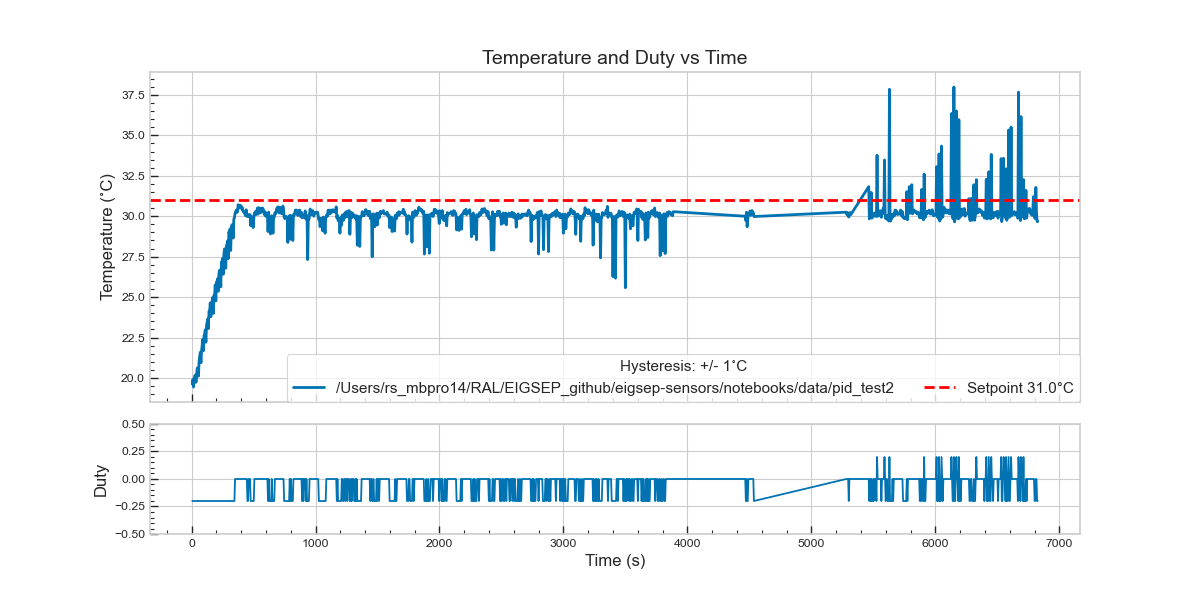

In [68]:
plot_data_with_duty(all_data)